<a href="https://colab.research.google.com/github/ShashiAI/RLinAction/blob/main/RL_in_Action_TaxiV3_Shashikant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About Taxi V3
- Textual environment with 5 rows and 5 columns. So, totally 25 locations in which the Taxi could be present.
- Out of these 25 locations, 4 locations indicated by; R, G, B and Y letters represent the locations where the passenger could be initially present. Additionally, passenger could also be in the Taxi after a legal pickup from one of the 4 locations.
- After a legal pick-up, one of the above four locations would be the destination where the Taxi has to drop-off the passenger. 
- It can be inferred that the total number of allowed states are 500.
- Initially, after a reset, the environment is setup randomly in one of the 500 states.
  - The passenger's location is indicated by color Blue
  - Destination location is indicated by color Magenta
  - Taxi color Yellow indicates the Taxi is empty and Green indicates the passenger is inside the Taxi (Color green after legal)
- The rewards are as follows:
  - -1 penalty for each step
  - -10 penalty for illegal pickup or dropoff
  - +20 reward for dropoff at destination

###Primary Goal:
- Drive the taxi and take one of the 6 actions (move North, South, East, West, pick-up and drop-off) per step to pickup and dropoff the passenger in the indicated locations

###Secondary Goal:
- Achieve the primary goal in the least number of steps or having the highest cumulative reward for that episode  
Note: A penalty of -1 per step dictates that the shortest path would be the most efficient.

### Taxi-V3 setup and environment understanding


In [1]:
import gym
taxi = gym.make('Taxi-v3')

In [2]:
taxi.reset()

262

Resetting sets the environment in one of the 500 possible states randomly.

Note: 500 = 25 possible positions for taxi * 5 possible positions for passenger (including in taxi) * 4 locations for destination.

In [3]:
taxi.render() #Visualize Taxi state

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [4]:
taxi.reset()

327

In [5]:
taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [6]:
taxi.observation_space

Discrete(500)

In [7]:
taxi.action_space

Discrete(6)

**TaxiEnv** Class Methods and Variables:

In [8]:
#Print methods and class variables
print (dir(taxi))
print (dir(taxi.env))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_elapsed_steps', '_max_episode_steps', 'action_space', 'class_name', 'close', 'compute_reward', 'env', 'metadata', 'observation_space', 'render', 'reset', 'reward_range', 'seed', 'spec', 'step', 'unwrapped']
['P', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'action_space', 'close', 'decod

In [9]:
taxi.env.s #gives current state of the env

327

In [10]:
print (vars(taxi))

{'env': <gym.envs.toy_text.taxi.TaxiEnv object at 0x7fed68ea64d0>, 'action_space': Discrete(6), 'observation_space': Discrete(500), 'reward_range': (-inf, inf), 'metadata': {'render.modes': ['human', 'ansi']}, '_max_episode_steps': 200, '_elapsed_steps': 0}


**Decode** method:
- Given a valid state (0 to 499) returns the following:
taxi row, taxi col, passenger location, destination index

In [11]:
for i in taxi.env.decode(28):
  print(i)

0
1
2
0


In [12]:
taxi.locs #Fixed R, G, B and Y locations

[(0, 0), (0, 4), (4, 0), (4, 3)]

In [13]:
taxi.env.s = 28
taxi.render() #verify that the above decode outputs is the same as the below rendered state

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [14]:
taxi.env.encode(2,0,0,3) #get the state for: Taxi at: 3rd row, 1st column and passenger at first loc and dest is at the last location

203

In [15]:
taxi.env.s = 203 #verify if the encoded state has the description mentioned above

In [16]:
taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Note: There is no error-checking on the maximum value given to the dest_idx !

For example, try to give dest_idx as 10 (invalid)

In [17]:
taxi.env.encode(2,0,0,10) # Wrong input for dest_idx

210

In [18]:
print (taxi.env.P) #Transition table --> States v/s Actions and for each of the 6 actions; Probability, next state, reward and done flag

{0: {0: [(1.0, 100, -1, False)], 1: [(1.0, 0, -1, False)], 2: [(1.0, 20, -1, False)], 3: [(1.0, 0, -1, False)], 4: [(1.0, 16, -1, False)], 5: [(1.0, 0, -10, False)]}, 1: {0: [(1.0, 101, -1, False)], 1: [(1.0, 1, -1, False)], 2: [(1.0, 21, -1, False)], 3: [(1.0, 1, -1, False)], 4: [(1.0, 17, -1, False)], 5: [(1.0, 1, -10, False)]}, 2: {0: [(1.0, 102, -1, False)], 1: [(1.0, 2, -1, False)], 2: [(1.0, 22, -1, False)], 3: [(1.0, 2, -1, False)], 4: [(1.0, 18, -1, False)], 5: [(1.0, 2, -10, False)]}, 3: {0: [(1.0, 103, -1, False)], 1: [(1.0, 3, -1, False)], 2: [(1.0, 23, -1, False)], 3: [(1.0, 3, -1, False)], 4: [(1.0, 19, -1, False)], 5: [(1.0, 3, -10, False)]}, 4: {0: [(1.0, 104, -1, False)], 1: [(1.0, 4, -1, False)], 2: [(1.0, 24, -1, False)], 3: [(1.0, 4, -1, False)], 4: [(1.0, 4, -10, False)], 5: [(1.0, 4, -10, False)]}, 5: {0: [(1.0, 105, -1, False)], 1: [(1.0, 5, -1, False)], 2: [(1.0, 25, -1, False)], 3: [(1.0, 5, -1, False)], 4: [(1.0, 5, -10, False)], 5: [(1.0, 5, -10, False)]}, 6: 

**DiscreteEnv** Class

TaxiEnv class derives from the DiscreteEnv baseclass. DiscreteEnv, implements the **reset** and **step** methods to reset and increment the Taxi Environment by one step (based on input action) respectively.

In [19]:
print (taxi)

<TimeLimit<TaxiEnv<Taxi-v3>>>


### Interact with the environment.

In [20]:
inputKeyActionMap = {'s':0,'n':1,'e':2,'w':3,'p':4,'d':5}

In [21]:
taxi.reset()
taxi.render()
while True:
    try:
        ip = "x" #input('>>') # Disabled for now
        if ip in inputKeyActionMap.keys():
          act = inputKeyActionMap[ip]
          if act in taxi.action_space:
            print(taxi.step(act))
            print()
            taxi.render()
          else:
            print(f'Invalid action:{act}')
        else:
          if ip == 'r':
              print(taxi.reset())
              print()
              taxi.render()
          elif ip == 'x':
              break
          else:
              print(f'Invalid input:{ip}')
    except Exception as e:
        print(e)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [22]:
taxi.env.s = 0 #possible to set the environment to particular state manually
taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [23]:
taxi.env.s = 100
taxi.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



### Take random actions to solve Taxi-V3 problem.

In [24]:
actionsMap = {0:"south",1:"north",2:"east",3:"west",4:"pick-up",5:"drop-off"}

In [25]:
import time
taxi.reset()
#taxi.env.s = 7
taxi.render()
done = False
cumReward = 0
episodeLen = 0
penalties = 0
maxEpisodeLen = 50#300
while not done and episodeLen < maxEpisodeLen:
  act = taxi.env.action_space.sample()
  print("Random action : ",actionsMap[act])
  state, reward, done, p = taxi.step(int(act))
  cumReward += reward
  if reward == -10:
    penalties += 1
  episodeLen += 1
  print()
  print ("episode Length:",episodeLen, "state:",state," reward:",reward," cumulative reward:",cumReward, "penalties:",penalties ,"Done:",done)
  print()
  taxi.render()
  #time.sleep(0.1)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Random action :  south

episode Length: 1 state: 201  reward: -1  cumulative reward: -1 penalties: 0 Done: False

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Random action :  pick-up

episode Length: 2 state: 201  reward: -10  cumulative reward: -11 penalties: 1 Done: False

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Random action :  pick-up

episode Length: 3 state: 201  reward: -10  cumulative reward: -21 penalties: 2 Done: False

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Random action :  west

episode Length: 4 state: 201  reward: -1  cumulative reward: -22 penalties: 2 Done: False

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Random action :  pick-up

episode Length: 5 state: 201  reward: -10  cumul

Note: After episode length of 200 steps, the Done flag is automatically made True to terminate the game.

### Evaluation, visualization and supporting functions

A function to drive taxi based on input policy

In [26]:
def drive_taxi_by_policy(policy, maxEpisodeLen=200, iterationsToRun=10, debug=True):
  cumRewardPerEpisode = 0
  episodeLen = 0
  penaltiesPerEpisode = 0

  finalCumReward = 0
  finalPenalties = 0

  rewardsList = []

  for i in range(iterationsToRun):
    taxi.reset()
    #taxi.env.s = 499
    if debug:
      taxi.render()
    done = False
    if debug:
      print("Starting iteration:",i, " begins with state: ", taxi.env.s)
      print ("--------------------------------------------------------------------")

    wLoop = 0
    while not done:
      act = policy[taxi.env.s] #taxi.env.action_space.sample()
      if debug:
        print("action according to policy: ",actionsMap[act])
      episodeLen += 1
      #if (episodeLen > maxEpisodeLen):
        #print ("Max episode length reached. Try again!")
      #  break
      state, reward, done, p = taxi.step(act)
      cumRewardPerEpisode += reward
      if reward == -10:
        penaltiesPerEpisode += 1
      
      if debug:
        print()
        print ("episode Length:",episodeLen, "state:",state," reward:",reward," cumulative reward:",cumRewardPerEpisode, "penalties:",penaltiesPerEpisode ,"Done:",done)
        print()
        taxi.render()

    rewardsList.append(cumRewardPerEpisode)
    finalCumReward += cumRewardPerEpisode
    finalPenalties += penaltiesPerEpisode
    
    if debug:
      print("Finished iteration:",i)
      print ("Running cumulative reward:", finalCumReward, " Running penalties:", finalPenalties)
      print ("--------------------------------------------------------------------")    

    cumRewardPerEpisode = 0
    episodeLen = 0
    penaltiesPerEpisode = 0

  print("DONE")
  print ("********************************************************************")
  print("Average Reward per iteration:", finalCumReward/iterationsToRun)
  print("Total penalties incurred:", finalPenalties)
  print ("********************************************************************")

  return rewardsList

Visualizing the Policy (Courtesy: Dian)

In [27]:
def pretty_print_policy(polcy, taxi, drop_off=False, render=True):
    if render:
      taxi.render()
    taxi_row, taxi_col, pass_idx, dest_idx = taxi.decode(taxi.s)
    if drop_off: pass_idx = 4
    direction_repr = {1:' 🡑 ', 2:' 🡒 ', 3:' 🡐 ', 0:' 🡓 ', None:' ⬤ ', 4:' O ', 5:' X '}
    for row in range(5):
        for col in range(5):
            state = taxi.encode(row, col, pass_idx, dest_idx)
            print(direction_repr[polcy[state]],end='')
        print()

A function to evaluate Rubrik criteria

In [28]:
def rubrik_criteria(rewards_list,windowSize=100,fifthPercentile=7.2, nintyFifthPercentile=8.2):
  assert len(rewards_list) == 1000, f"The length of the input rewards list does not meet the rubirk's criteria of 1000!"
  #calculate average over window of size = windowSize
  avgRewardsList = []

  for i in range(901):
    avgRewardsList.append(sum(rewards_list[0+i:windowSize-1+i])/len(rewards_list[0+i:windowSize-1+i]))
  
  #calculate the 5th and 95th percentile across the average rewards list
  fP = np.percentile(avgRewardsList,5)
  nfP = np.percentile(avgRewardsList,95)
  print ("5th Percentile: ",fP)
  print ("95th Percentile: ",nfP)

  #check against the Rubrik's threshold criteria
  if (fP >= fifthPercentile and nfP >= nintyFifthPercentile):
    print ()
    print ("Result: Pass!")
    print ()
  else:
    print ()
    print ("Result: Fail")
    print ()
  return avgRewardsList

Supporting functions and parameters

In [29]:
import numpy as np
import pandas as pd
from tqdm import tqdm 

In [30]:
HYPER_PARAMS = {'gamma':0.9} # gamma is the discounting factor for future rewards

In [31]:
def greedy_policy_from_returns_tbl(table):
    """
    Given a returns table return the greedy/optimum policy
    """
    plc = {s:None for s in table.index }
    for state in table.index:
        greedy_action = table.loc[state].idxmax()
        plc[state] = greedy_action
            
    return plc

In [32]:
def epsilon_greedy_action_from_Q(Q, state, epsilon):
    """
    Given a returns table (Q), current state and the
    epsilon factor indicating the probability of taking
    random/non-optimum action, return the next action to take
    """
    actions = Q.columns
    action_probs = np.asarray([epsilon/len(actions)]*len(actions),dtype=np.float)
    
    greedy_action_index = np.argmax(Q.loc[state].values)
    action_probs[greedy_action_index] += 1-epsilon

    epsilon_greedy_action = np.random.choice(Q.columns,p=action_probs)
    
    return epsilon_greedy_action

### Try SARSA

Experiments:
1. 
  - n_episodes = 5000, epsilon = 1, min_epsilon = 0.1, epsilon_decay = 0.9995, alpha = 0.001. 
  - Result: Not enough number of episodes to learn.

2. 
  - n_episodes = 10000, epsilon = 1, min_epsilon = 0.1, epsilon_decay = 0.9995, alpha = 0.001. 
  - Result: Not enough number of episodes to learn. Actions still quite random.

3. 
  - n_episodes = 100000, epsilon = 1, min_epsilon = 0.1, epsilon_decay = 0.995, alpha = 0.01 (higher learning rate). 
  - Result: Many deadlocks still present.

4. 
  - n_episodes = 100000, epsilon = 1, min_epsilon = 0.1, epsilon_decay = 0.9 (decay faster to encourage more exploitation), alpha = 0.01 (higher learning rate). 
  - Result: Best possible policy.

5. 
  - n_episodes = 100000, epsilon = 1, min_epsilon = 0.1, epsilon_decay = 0.9 (decay faster to encourage more exploitation), alpha = 0.1 (higher learning rate). 
  - Result: average rewards mostly negative.  

In [33]:
from tqdm import tqdm 
Q = pd.DataFrame.from_dict({s:{a:0 for a in range(taxi.env.nA)} for s in range(taxi.env.nS)}, orient='index')

n_episodes = 100000
epsilon = 1
min_epsilon = 0.1
epsilon_decay = 0.9
HYPER_PARAMS['gamma'] = 0.9
alpha = 0.01

rewards_sarsa_plot = np.zeros(n_episodes)

for i in tqdm(range(n_episodes)):
    taxi.reset()
    s0 = taxi.env.s
    a0 = epsilon_greedy_action_from_Q(Q,s0,epsilon)
    
    done = False
    
    episode_reward = 0
    while not done:
      s1, reward, done, _  = taxi.step(a0)
      a1 = epsilon_greedy_action_from_Q(Q,s1,epsilon)
      
      Q.loc[s0,a0] += alpha*(reward + HYPER_PARAMS['gamma']*Q.loc[s1,a1] - Q.loc[s0,a0])
      
      s0, a0 = s1, a1
      episode_reward += reward
  
    epsilon *= epsilon_decay
    epsilon = max(epsilon,min_epsilon)

    rewards_sarsa_plot[i] = episode_reward

policy_SARSA = greedy_policy_from_returns_tbl(Q)
print(policy_SARSA)

100%|██████████| 100000/100000 [24:40<00:00, 67.55it/s]


{0: 0, 1: 4, 2: 4, 3: 4, 4: 2, 5: 0, 6: 2, 7: 2, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 5, 17: 0, 18: 0, 19: 0, 20: 0, 21: 3, 22: 3, 23: 3, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 3, 32: 0, 33: 0, 34: 0, 35: 0, 36: 3, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 2, 45: 0, 46: 2, 47: 2, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 2, 55: 0, 56: 0, 57: 2, 58: 0, 59: 2, 60: 0, 61: 2, 62: 0, 63: 3, 64: 2, 65: 0, 66: 2, 67: 2, 68: 0, 69: 3, 70: 0, 71: 3, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 2, 78: 0, 79: 0, 80: 0, 81: 1, 82: 3, 83: 0, 84: 4, 85: 0, 86: 4, 87: 4, 88: 3, 89: 3, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 3, 97: 5, 98: 3, 99: 0, 100: 0, 101: 1, 102: 1, 103: 1, 104: 0, 105: 0, 106: 0, 107: 2, 108: 0, 109: 0, 110: 0, 111: 0, 112: 2, 113: 0, 114: 0, 115: 0, 116: 1, 117: 0, 118: 0, 119: 0, 120: 0, 121: 3, 122: 3, 123: 3, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 3, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 3, 137: 0, 138: 

In [49]:
taxi.reset()
pretty_print_policy(policy_SARSA, taxi)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

 🡓  🡓  🡒  🡓  🡓 
 🡓  🡓  🡓  🡓  🡐 
 🡒  🡒  🡒  🡓  🡓 
 🡑  🡑  🡑  🡓  🡐 
 🡑  🡒  🡑  O  🡐 


In [50]:
pretty_print_policy(policy_SARSA, taxi, drop_off=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

 🡓  🡓  🡓  🡓  🡐 
 🡓  🡓  🡓  🡓  🡐 
 🡓  🡐  🡐  🡐  🡐 
 🡓  🡑  🡑  🡑  🡐 
 X  🡑  🡑  🡑  🡐 


In [52]:
rewards_sarsa = drive_taxi_by_policy(policy_SARSA,iterationsToRun=1000,debug=False)

DONE
********************************************************************
Average Reward per iteration: 1.739
Total penalties incurred: 0
********************************************************************


In [54]:
min (rewards_sarsa)

-200

In [55]:
max (rewards_sarsa)

15

In [56]:
print (rubrik_criteria(rewards_sarsa))

5th Percentile:  -2.595959595959596
95th Percentile:  8.282828282828282

Result: Fail

[-2.313131313131313, -2.323232323232323, -2.3636363636363638, -2.313131313131313, -2.323232323232323, -2.3434343434343434, -2.3636363636363638, -4.474747474747475, -4.454545454545454, -4.444444444444445, -2.3737373737373737, -2.4242424242424243, -2.494949494949495, -2.515151515151515, -4.606060606060606, -4.565656565656566, -4.555555555555555, -4.595959595959596, -4.575757575757576, -4.575757575757576, -2.474747474747475, -2.494949494949495, -2.484848484848485, -2.484848484848485, -2.484848484848485, -2.484848484848485, -2.484848484848485, -2.5454545454545454, -2.5757575757575757, -2.606060606060606, -2.595959595959596, -2.585858585858586, -2.6363636363636362, -2.6262626262626263, -0.5454545454545454, -0.5555555555555556, -0.5757575757575758, -0.5555555555555556, -0.5959595959595959, -0.5959595959595959, -0.5555555555555556, -0.5757575757575758, -0.5858585858585859, -0.5454545454545454, -0.5959595959

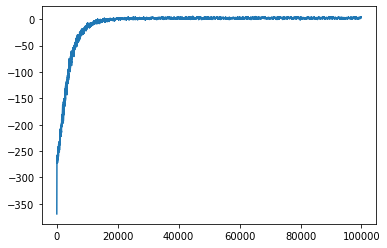

In [57]:
import matplotlib.pyplot as plt
windowed_rewards = np.convolve(rewards_sarsa_plot, np.ones(100), 'valid')
plt.plot(windowed_rewards/100)
plt.show()

### Try Q-Learning

Experiments: (Reuse hyperparameters from Sarsa)
1. 
  - n_episodes = 100000, epsilon = 1, min_epsilon = 0.1, epsilon_decay = 0.99 (decay faster to encourage more exploitation), alpha = 0.1 (higher learning rate), gamma = 0.9
  - Result: Rubrik Pass.

2.   
  - n_episodes = 100000, epsilon = 1, min_epsilon = 0.1, epsilon_decay = 0.9 (decay faster to encourage more exploitation), alpha = 0.1 (higher learning rate), gamma = 0.8 (give lesser weightage for future returns)
  - Result: Rubrik pass. Better average rewards.

In [39]:
from tqdm import tqdm 
Q = pd.DataFrame.from_dict({s:{a:0 for a in range(taxi.env.nA)} for s in range(taxi.env.nS)}, orient='index')

n_episodes = 100000
epsilon = 1
min_epsilon = 0.1
epsilon_decay = 0.9

alpha = 0.1
HYPER_PARAMS['gamma'] = 0.8

rewards_q_learning_plot = np.zeros(n_episodes)
for i in tqdm(range(n_episodes)):
    taxi.reset()
    s0 = taxi.s
    done = False
    
    episode_reward = 0
    while not done:
        a0 = epsilon_greedy_action_from_Q(Q,s0,epsilon)
        s1, reward, done, _  = taxi.step(a0)
        
        Q.loc[s0,a0] += alpha*(reward + HYPER_PARAMS['gamma']*Q.loc[s1].max() - Q.loc[s0,a0])
        episode_reward += reward
        
        s0 = s1
  
    epsilon *= epsilon_decay
    epsilon = max(epsilon,min_epsilon)

    rewards_q_learning_plot[i] = episode_reward

policy_Q_Learning = greedy_policy_from_returns_tbl(Q)
print(policy_Q_Learning)

100%|██████████| 100000/100000 [21:24<00:00, 77.83it/s]


{0: 0, 1: 4, 2: 4, 3: 4, 4: 2, 5: 0, 6: 0, 7: 2, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 2, 14: 0, 15: 0, 16: 5, 17: 0, 18: 0, 19: 0, 20: 0, 21: 3, 22: 3, 23: 3, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 3, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 2, 45: 0, 46: 2, 47: 2, 48: 0, 49: 0, 50: 0, 51: 0, 52: 2, 53: 0, 54: 0, 55: 0, 56: 0, 57: 2, 58: 0, 59: 2, 60: 0, 61: 0, 62: 0, 63: 0, 64: 2, 65: 0, 66: 2, 67: 2, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 2, 78: 0, 79: 0, 80: 0, 81: 3, 82: 0, 83: 0, 84: 4, 85: 0, 86: 4, 87: 4, 88: 0, 89: 3, 90: 0, 91: 3, 92: 3, 93: 0, 94: 3, 95: 0, 96: 3, 97: 5, 98: 3, 99: 0, 100: 0, 101: 1, 102: 1, 103: 1, 104: 2, 105: 0, 106: 0, 107: 2, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 2, 114: 0, 115: 0, 116: 1, 117: 0, 118: 0, 119: 2, 120: 0, 121: 3, 122: 3, 123: 3, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 3, 137: 0, 138: 

In [40]:
taxi.reset()
pretty_print_policy(policy_Q_Learning, taxi)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

 🡓  🡓  🡓  🡓  🡐 
 🡓  🡓  🡓  🡓  🡐 
 🡓  🡐  🡐  🡐  🡐 
 🡓  🡑  🡑  🡑  🡐 
 O  🡑  🡑  🡑  🡐 


In [41]:
pretty_print_policy(policy_Q_Learning, taxi, drop_off=True)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

 🡓  🡓  🡒  🡒  X 
 🡓  🡓  🡒  🡑  🡑 
 🡒  🡒  🡒  🡑  🡑 
 🡑  🡑  🡑  🡑  🡑 
 🡑  🡑  🡑  🡑  🡑 


In [42]:
drive_taxi_by_policy(policy_Q_Learning,iterationsToRun=1,debug=True) #vizualizing for a single run

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Starting iteration: 0  begins with state:  482
--------------------------------------------------------------------
action according to policy:  north

episode Length: 1 state: 382  reward: -1  cumulative reward: -1 penalties: 0 Done: False

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
action according to policy:  west

episode Length: 2 state: 362  reward: -1  cumulative reward: -2 penalties: 0 Done: False

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
action according to policy:  north

episode Length: 3 state: 262  reward: -1  cumulative reward: -3 penalties: 0 Done: False

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
action according to policy:  west

episode Length: 4 state: 242  reward: -1  cumulative reward: -4 penalties: 0 Done: False

+---------+
|R: 

[7]

In [68]:
rewards_q_learning = drive_taxi_by_policy(policy_Q_Learning,iterationsToRun=10000,debug=False)

DONE
********************************************************************
Average Reward per iteration: 7.9229
Total penalties incurred: 0
********************************************************************


In [69]:
print (rewards_q_learning)

[4, 8, 7, 5, 8, 9, 7, 9, 6, 14, 10, 9, 5, 7, 5, 6, 3, 8, 10, 4, 8, 6, 9, 10, 8, 11, 9, 5, 10, 9, 13, 7, 5, 14, 7, 6, 10, 6, 5, 11, 5, 8, 9, 7, 6, 11, 9, 4, 6, 9, 10, 11, 6, 7, 9, 7, 6, 11, 8, 9, 7, 11, 9, 7, 9, 11, 3, 9, 9, 7, 9, 9, 5, 7, 8, 9, 5, 8, 5, 8, 9, 6, 11, 7, 13, 6, 10, 8, 7, 4, 6, 13, 10, 12, 4, 6, 4, 5, 4, 9, 7, 7, 8, 11, 12, 9, 6, 8, 8, 12, 9, 8, 10, 5, 3, 9, 5, 9, 10, 8, 7, 4, 8, 13, 6, 7, 10, 4, 6, 11, 4, 8, 7, 6, 7, 10, 9, 7, 8, 10, 8, 5, 6, 11, 8, 4, 7, 8, 8, 9, 7, 11, 4, 9, 5, 15, 14, 4, 7, 11, 8, 9, 3, 5, 6, 7, 4, 11, 11, 5, 5, 11, 10, 8, 7, 10, 6, 6, 6, 6, 7, 4, 9, 7, 9, 7, 7, 11, 6, 7, 5, 5, 8, 7, 5, 5, 6, 5, 6, 8, 6, 11, 8, 9, 8, 11, 6, 8, 11, 8, 3, 7, 7, 10, 6, 9, 13, 6, 9, 10, 8, 6, 13, 9, 7, 9, 4, 5, 10, 6, 7, 8, 4, 6, 6, 13, 5, 8, 10, 14, 6, 5, 10, 4, 6, 12, 5, 8, 6, 5, 11, 6, 10, 7, 7, 12, 5, 11, 4, 6, 5, 11, 5, 8, 8, 8, 7, 4, 6, 9, 9, 10, 9, 10, 8, 10, 11, 7, 12, 11, 7, 7, 11, 7, 8, 7, 7, 10, 8, 10, 7, 8, 4, 5, 8, 10, 8, 11, 7, 4, 11, 9, 10, 7, 7, 6, 5, 11, 

In [70]:
min(rewards_q_learning)

3

In [71]:
max(rewards_q_learning)

15

In [72]:
print (rubrik_criteria(rewards_q_learning[-1000:]))

5th Percentile:  7.626262626262626
95th Percentile:  8.333333333333334

Result: Pass!

[7.7272727272727275, 7.7272727272727275, 7.707070707070707, 7.636363636363637, 7.646464646464646, 7.616161616161616, 7.606060606060606, 7.595959595959596, 7.636363636363637, 7.656565656565657, 7.666666666666667, 7.666666666666667, 7.656565656565657, 7.616161616161616, 7.616161616161616, 7.626262626262626, 7.666666666666667, 7.626262626262626, 7.636363636363637, 7.626262626262626, 7.636363636363637, 7.686868686868687, 7.6767676767676765, 7.656565656565657, 7.636363636363637, 7.646464646464646, 7.666666666666667, 7.666666666666667, 7.646464646464646, 7.585858585858586, 7.575757575757576, 7.555555555555555, 7.585858585858586, 7.666666666666667, 7.636363636363637, 7.646464646464646, 7.646464646464646, 7.6767676767676765, 7.646464646464646, 7.585858585858586, 7.616161616161616, 7.636363636363637, 7.666666666666667, 7.696969696969697, 7.717171717171717, 7.707070707070707, 7.767676767676767, 7.8080808080808

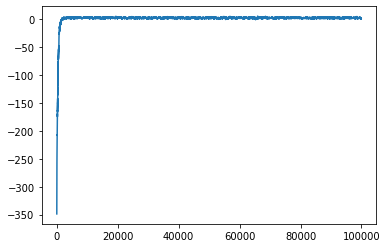

In [73]:
import matplotlib.pyplot as plt
windowed_rewards = np.convolve(rewards_q_learning_plot, np.ones(100), 'valid')
plt.plot(windowed_rewards/100)
plt.show()